<a href="https://colab.research.google.com/github/hooooooni/google_review_LDA_english/blob/main/TextBlob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 웹 크롤링

구글 플레이 스토어에서 리뷰 데이터를 가져올 예정입니다.

In [25]:
!pip install -qq google-play-scraper

google-play-scraper는 구글 플레이 스토어 (Google Play Store)에서 앱 정보를 스크래핑하고 수집하기 위한 도구를 제공하는 Python 패키지

In [26]:
!pip install -qq -U watermark

In [27]:
%reload_ext watermark
%watermark -v -p pandas,matplotlib,seaborn,google_play_scraper

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

pandas             : 1.5.3
matplotlib         : 3.7.1
seaborn            : 0.12.2
google_play_scraper: 1.2.4



In [28]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

- json: JSON 데이터 처리를 위한 파이썬 표준 라이브러리.
- pandas: 데이터 프레임을 다루기 위한 라이브러리.
- tqdm: 진행 상황을 시각적으로 표시해주는 라이브러리.
- seaborn: Matplotlib을 기반으로한 통계용 그래픽 라이브러리로, 시각화를 보다 멋지게 표현할 수 있도록 도와줌.
- matplotlib.pyplot: 데이터 시각화를 위한 라이브러리.
- pygments: 코드 문법 강조를 위한 라이브러리.

<br><br>

- `google_play_scraper`: Google Play 스토어에서 앱 정보 및 리뷰를 가져오기 위한 라이브러리
- `%matplotlib inline`: Jupyter Notebook에서 그래픽 출력을 활성화.
- `%config InlineBackend.figure_format='retina'`: 그래픽 출력 설정을 'retina'로 지정하여 고해상도 그래픽 출력을 활성화.
- `sns.set()`: Seaborn 라이브러리의 스타일, 팔레트, 글꼴 크기 등을 초기화하여 설정.

In [29]:
app_packages = [
  'com.anydo',
  'com.todoist',
  'com.ticktick.task',
  'com.habitrpg.android.habitica',
  'cc.forestapp',
  'com.oristats.habitbull',
  'com.levor.liferpgtasks',
  'com.habitnow',
  'com.microsoft.todos',
  'prox.lab.calclock',
  'com.gmail.jmartindev.timetune',
  'com.artfulagenda.app',
  'com.tasks.android',
  'com.appgenix.bizcal',
  'com.appxy.planner'
]

 * 각 항목은 구글 플레이 스토어에서 특정 앱을 식별하는 데 사용되는 패키지 이름

In [30]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='us')
  del info['comments']
  app_infos.append(info)

100%|██████████| 15/15 [00:02<00:00,  6.30it/s]


-> 리뷰 정보를 제외한 앱 정보를 리스트에 추가합니다. <br>
lang 매개변수는 언어를 나타내며, 여기서는 영어로 설정되어 있습니다. country 매개변수는 국가를 나타내며, 여기서는 미국으로 설정되어 있습니다.

In [31]:
def print_json(json_object):
  json_str = json.dumps(
    json_object,
    indent=2,
    sort_keys=True,
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

print_json이라는 이름의 함수를 정의합니다. 이 함수는 JSON 객체를 인자로 받아서 읽기 좋게 출력하는 역할을 합니다.

json.dumps 함수를 사용하여 JSON 객체를 문자열로 변환합니다. <br>

- json_object: 변환할 JSON 객체를 나타냅니다.
- indent=2: 들여쓰기를 2칸으로 설정하여 출력 형식을 보기 좋게 만듭니다.
- sort_keys=True: 키를 알파벳 순서로 정렬하여 출력합니다.
- default=str: 기본적으로는 JSON 인코딩 중에 발생하는 TypeError를 방지하기 위해 사용되며, str 함수를 사용하여 객체를 문자열로 변환합니다.


- pygments 라이브러리를 사용하여 JSON 문자열을 하이라이트 처리한 후 출력합니다.


> JsonLexer(): JSON 형식에 대한 lexer(문법 강조기)를 생성합니다.

> TerminalFormatter(): 터미널에 출력할 때 사용할 formatter(서식 지정기)를 생성합니다.

> highlight() 함수로 JSON 문자열을 하이라이트 처리하고, print() 함수로 출력합니다.



In [32]:
print_json(app_infos[0])

{
  "adSupported": false,
  "appId": "com.anydo",
  "categories": [
    {
      "id": "PRODUCTIVITY",
      "name": "Productivity"
    }
  ],
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "\ud83e\udd47 <b>\"#1 to do list app out there\u201d</b> - WSJ\r\n\ud83c\udfc6 <b>Editor's Choice</b> by Google\r\n\r\nOver 40M people rely on Any.do to stay organized and get more done.\r\nIt's a simple to do list app with reminders, a planner & calendar - all in one.\r\n\r\n<b>\ud83e\udd47 \"A MUST HAVE APP\" (Lifehacker, NYTimes, USA TODAY).</b>\r\n\r\nAny.do is a free to-do list, planner & calendar app for managing and organizing your daily tasks, to-do lists, notes, reminders, checklists, calendar events, grocery lists, and more.\r\n\r\nOrganize your tasks & to-do list\r\n\r\n\u2022 ADVANCED CALENDAR & DAILY PLANNER - Keep your to-do list and calendar events always at hand with our calendar widget. Any.do to-do lis

가져온 리뷰 정보를 확인합니다.

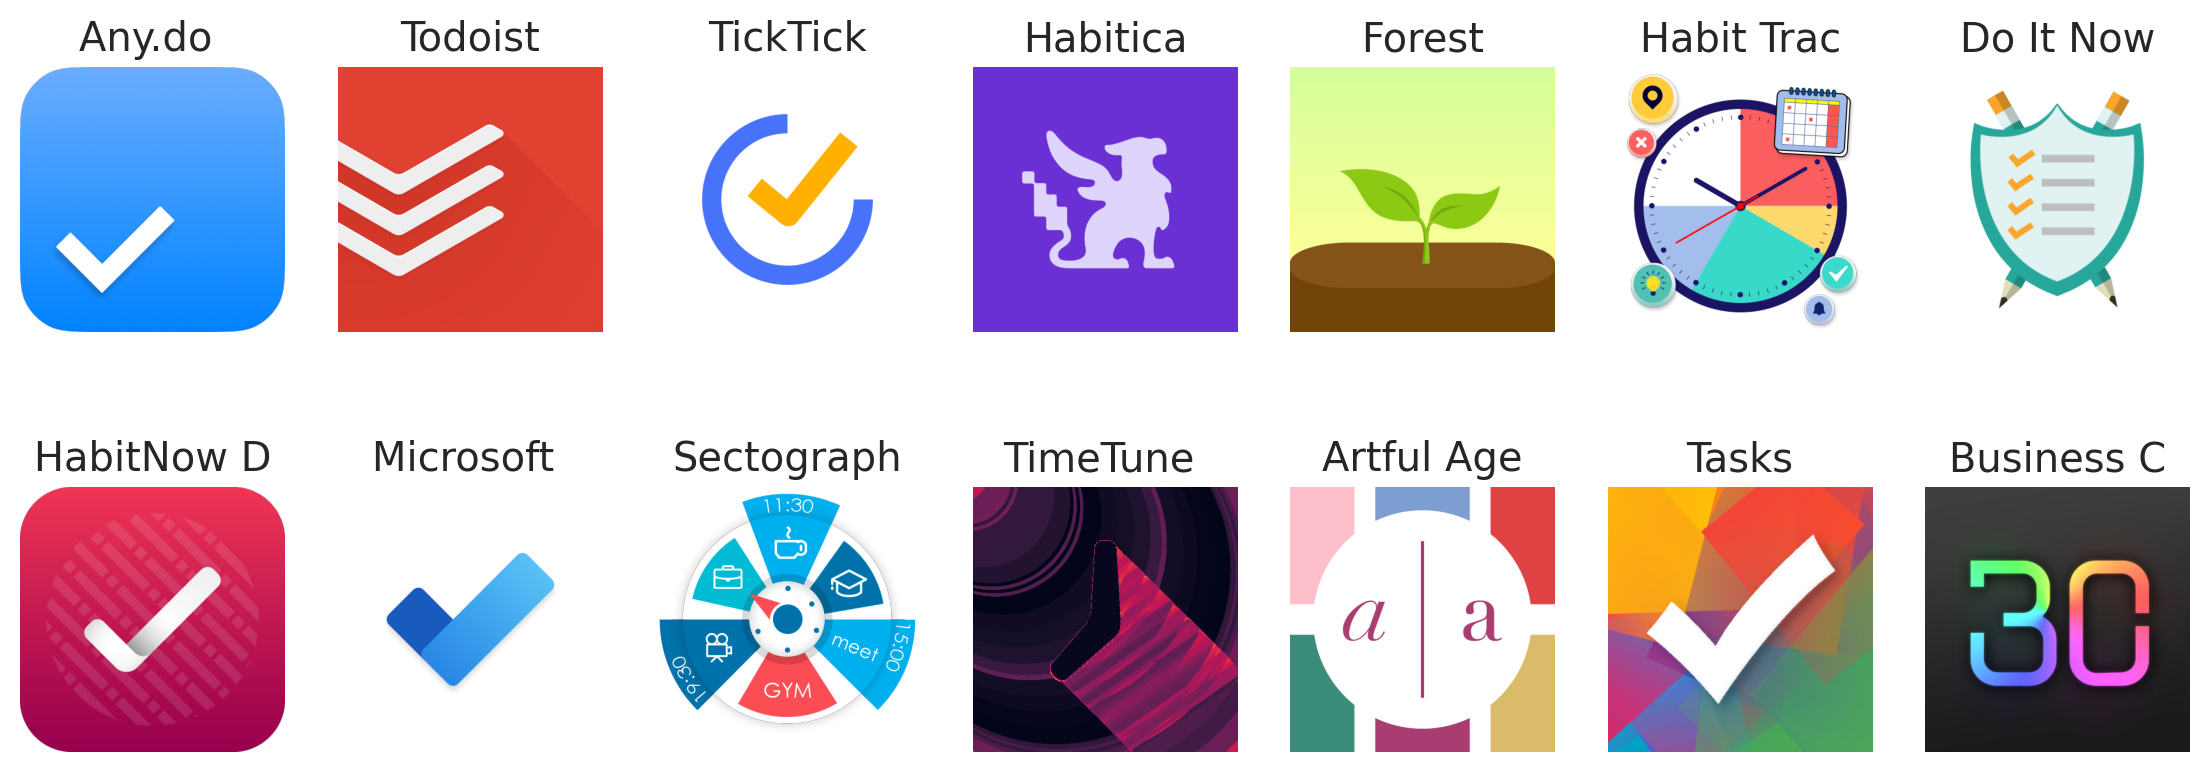

In [33]:
import urllib
import numpy as np
from PIL import Image  # Image 클래스를 가져옵니다.
import matplotlib.pyplot as plt

def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]

fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(14, 5))

for i, ax in enumerate(axs.flat):
    ai = app_infos[i]
    img = Image.open(urllib.request.urlopen(ai['icon']))
    ax.imshow(np.array(img))
    ax.set_title(format_title(ai['title']))
    ax.axis('off')

리뷰를 가져온 앱들이 어떤 앱인지 확인할 수 있는 코드입니다.

In [34]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.to_csv('apps.csv', index=None, header=True)

app_infos 리스트에 저장된 앱 정보를 DataFrame으로 변환하고, 이를 CSV 파일로 저장하는 부분

In [35]:
app_reviews = []

for ap in tqdm(app_packages): #app_packages에 있는 각 앱 패키지에 대해 반복하고,
# 각 앱에 대해 1부터 5까지의 점수와 정렬 방법(MOST_RELEVANT, NEWEST)에 대해 반복합니다.
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='en',
        country='us',
        sort=sort_order,
        count= 200 if score == 3 else 100,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|██████████| 15/15 [00:28<00:00,  1.91s/it]


google_play_scraper 라이브러리의 reviews 함수를 사용하여 각 앱에 대한 리뷰를 가져옵니다. ap는 현재 앱 패키지, score는 현재 점수, sort_order는 정렬 방법을 나타냅니다. 리뷰는 최대 200개(점수가 3점일 때) 또는 100개(그 외 점수)까지 가져옵니다.

In [36]:
print_json(app_reviews[0])

{
  "appId": "com.anydo",
  "appVersion": "5.17.0.119",
  "at": "2023-07-02 17:35:08",
  "content": "I used to love this app, but recently they did a big push for premium. At the same time, I started having a huge issue with my lists not opening. The screen shows, but it is grayed out and I can't click on anything. I tried the premium to see if that would help, but it hasn't. My lists are inaccessible to me. I have tried uninstalling and reinstalling the app to noavail.",
  "repliedAt": "2023-07-03 09:28:29",
  "replyContent": "You should only see the upgrade ad when you first log into your accout or when you are trying to use premium features. You can always dismiss it, though! As for the lists issue - please contact us at https://www.any.do/contact_form or via Settings \u2192 Support and we will get that sorted for you! \ud83d\ude0a",
  "reviewCreatedVersion": "5.17.0.119",
  "reviewId": "eecc1d6f-2e1b-4d5c-bf06-e2ce6718c410",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUp

In [37]:
len(app_reviews)

17614

리뷰들이 몇 개인지 길이를 확인하는 코드입니다.

In [38]:
from google.colab import files

app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('reviews.csv', index=None, header=True)

files.download('reviews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

app_reviews 리스트에 저장된 앱 리뷰 정보를 DataFrame으로 변환하고, to_csv 함수를 사용하여 'reviews.csv'라는 파일로 저장합니다.

- 'reviews.csv': 저장할 CSV 파일의 이름을 지정합니다.

- index=None: DataFrame의 인덱스를 CSV 파일에 저장하지 않도록 설정합니다.

- header=True: 헤더(열 이름)를 CSV 파일에 포함시킵니다.

files.download 함수를 사용하여 'reviews.csv' 파일을 로컬로 다운로드합니다. 이를 구글 코랩 환경에서 실행할 경우 파일이 로컬로 다운로드됩니다.

# 2. 데이터 세팅

In [39]:
dataset_raw = pd.read_csv('reviews.csv') #본인 경로, 본인이 설정해 둔 파일명으로 수정
dataset_raw.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,eecc1d6f-2e1b-4d5c-bf06-e2ce6718c410,Krista Clark,https://play-lh.googleusercontent.com/a/ACg8oc...,"I used to love this app, but recently they did...",1,165,5.17.0.119,2023-07-02 17:35:08,You should only see the upgrade ad when you fi...,2023-07-03 09:28:29,5.17.0.119,most_relevant,com.anydo
1,48f76b7b-234f-474d-95db-e7ed321576bc,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Love the interface, love the concept. But it l...",1,23,4.15.4.11,2019-06-26 02:19:46,We are sorry to hear that you experience async...,2019-06-30 04:44:45,4.15.4.11,most_relevant,com.anydo
2,1177566d-6443-42ab-8320-7e8b3342cec8,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Product images show the month view at the top ...,1,13,NaN,2019-07-06 21:14:32,We appreciate the feedback. The images for iOS...,2019-07-09 11:45:56,NaN,most_relevant,com.anydo
3,d334cc2b-7e78-4b8b-9d11-ff198873a726,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,What an awful UI. When creating a new reminder...,1,8,4.10.8.0,2018-12-13 19:16:15,"To set a reminder, you only need to tap an exi...",2018-12-18 14:04:37,4.10.8.0,most_relevant,com.anydo
4,82d2f0c3-dbff-4722-89fa-d8af997ba4ab,Hyco Syco,https://play-lh.googleusercontent.com/a/ACg8oc...,This app used to be great when paired with Ale...,1,10,4.15.9.6,2020-06-17 17:32:55,"Sorry about that, our team is currently workin...",2020-06-18 06:47:52,4.15.9.6,most_relevant,com.anydo


In [40]:
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17614 entries, 0 to 17613
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              17614 non-null  object
 1   userName              17614 non-null  object
 2   userImage             17614 non-null  object
 3   content               17614 non-null  object
 4   score                 17614 non-null  int64 
 5   thumbsUpCount         17614 non-null  int64 
 6   reviewCreatedVersion  14955 non-null  object
 7   at                    17614 non-null  object
 8   replyContent          9547 non-null   object
 9   repliedAt             9547 non-null   object
 10  appVersion            14955 non-null  object
 11  sortOrder             17614 non-null  object
 12  appId                 17614 non-null  object
dtypes: int64(2), object(11)
memory usage: 1.7+ MB


In [41]:
dataset_raw.isnull().sum()

reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    2659
at                         0
replyContent            8067
repliedAt               8067
appVersion              2659
sortOrder                  0
appId                      0
dtype: int64

In [42]:
# axis = 0: 결측치 포함한 모든 행 제거
dataset = dataset_raw.dropna(axis = 0)
dataset.isnull().sum()

reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
replyContent            0
repliedAt               0
appVersion              0
sortOrder               0
appId                   0
dtype: int64

결측치를 확인하고 제거했습니다.

In [43]:
dataset

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,eecc1d6f-2e1b-4d5c-bf06-e2ce6718c410,Krista Clark,https://play-lh.googleusercontent.com/a/ACg8oc...,"I used to love this app, but recently they did...",1,165,5.17.0.119,2023-07-02 17:35:08,You should only see the upgrade ad when you fi...,2023-07-03 09:28:29,5.17.0.119,most_relevant,com.anydo
1,48f76b7b-234f-474d-95db-e7ed321576bc,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Love the interface, love the concept. But it l...",1,23,4.15.4.11,2019-06-26 02:19:46,We are sorry to hear that you experience async...,2019-06-30 04:44:45,4.15.4.11,most_relevant,com.anydo
3,d334cc2b-7e78-4b8b-9d11-ff198873a726,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,What an awful UI. When creating a new reminder...,1,8,4.10.8.0,2018-12-13 19:16:15,"To set a reminder, you only need to tap an exi...",2018-12-18 14:04:37,4.10.8.0,most_relevant,com.anydo
4,82d2f0c3-dbff-4722-89fa-d8af997ba4ab,Hyco Syco,https://play-lh.googleusercontent.com/a/ACg8oc...,This app used to be great when paired with Ale...,1,10,4.15.9.6,2020-06-17 17:32:55,"Sorry about that, our team is currently workin...",2020-06-18 06:47:52,4.15.9.6,most_relevant,com.anydo
6,a6b21375-312e-41b5-90ab-3d56273ca01b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This app was great until the latest update and...,1,42,4.12.0.5,2019-01-12 13:20:28,"We are sorry you feel this way, please note th...",2019-01-27 15:44:37,4.12.0.5,most_relevant,com.anydo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17338,b3da1e1e-36c7-4ea0-89f5-81ecde27207c,Lisselot Diaz,https://play-lh.googleusercontent.com/a-/ALV-U...,"Perfect planner, this is exactly what I needed...",4,0,6.1.2,2023-02-06 14:23:28,"Hi, please contact us at planner.a@appxy.com, ...",2023-02-09 01:11:22,6.1.2,newest,com.appxy.planner
17370,19ffdb48-dca5-4651-b957-2159b279f763,Kay Official,https://play-lh.googleusercontent.com/a-/ALV-U...,Sometime me events go missing once I edit them...,4,0,5.4,2022-05-23 13:28:10,"Hi, we are so sorry for the inconvenience. Wou...",2022-05-24 00:33:51,5.4,newest,com.appxy.planner
17422,55a9a67b-4b31-415f-a2be-886cd217f28c,Emily Parker,https://play-lh.googleusercontent.com/a-/ALV-U...,Can't get iPad and Android to sync info. As I ...,5,55,6.0.2,2022-08-24 13:42:11,"Hi, we are so sorry for the inconvenience. Wou...",2022-06-06 00:56:44,6.0.2,most_relevant,com.appxy.planner
17490,d6de6341-5225-4892-a752-73048c2f4b64,Leanne Clark,https://play-lh.googleusercontent.com/a-/ALV-U...,This is my go to planner app. I've never been ...,5,2,6.1.2,2022-12-14 20:19:18,"Hi, please contact us at planner.a@appxy.com, ...",2022-12-19 01:28:21,6.1.2,most_relevant,com.appxy.planner


# 3.  Sentiment

## 3-1. polarity score 시각화

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

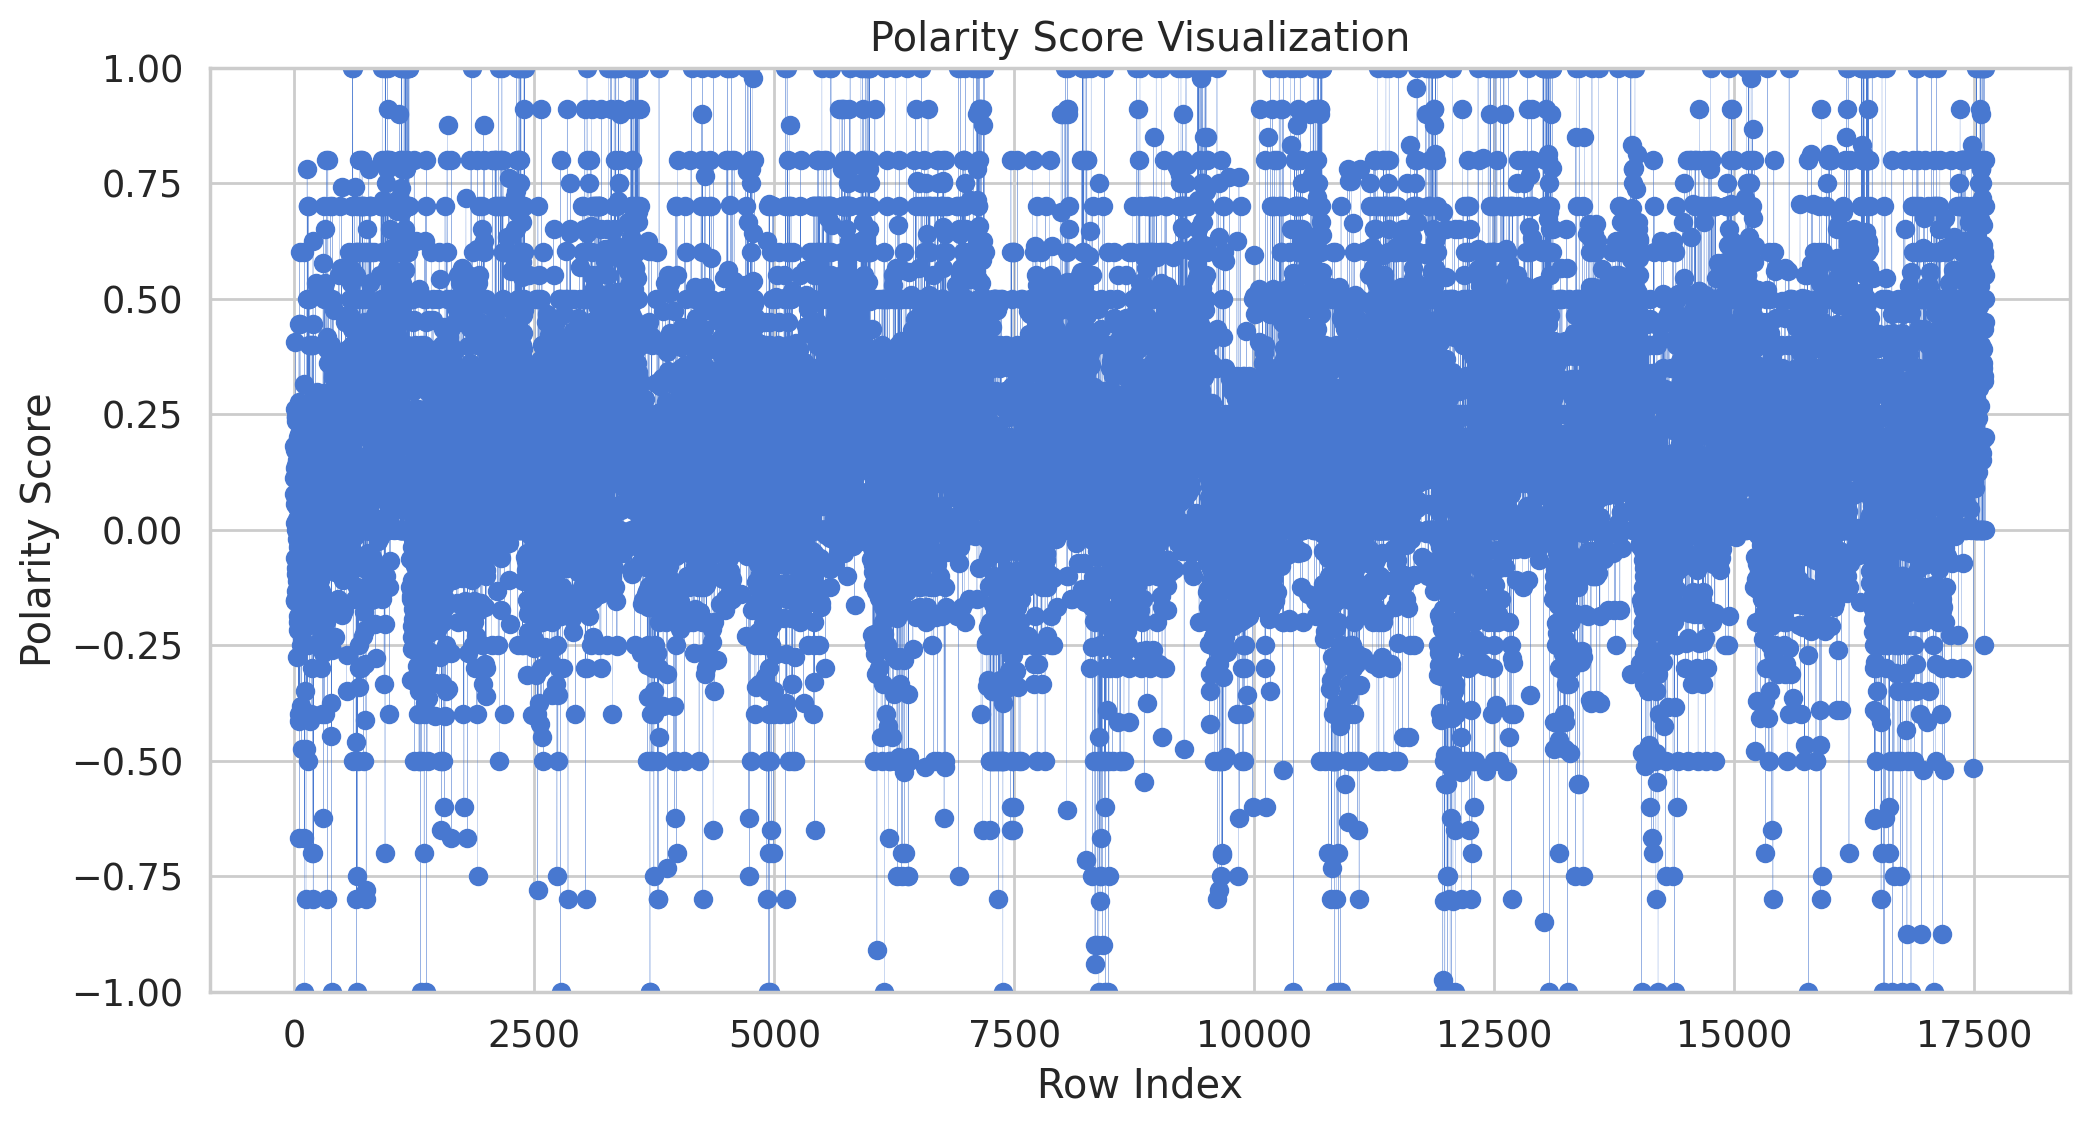

In [54]:
# Polarity score 계산 함수 정의
def calculate_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# apply 함수를 사용하여 polarity score 계산
dataset_raw['polarity'] = dataset_raw['content'].apply(calculate_polarity)

# 시각화 (선 그래프)
plt.figure(figsize=(12, 6))
plt.plot(dataset_raw['polarity'], marker='o', linewidth=0.1)
plt.ylim(-1, 1)
plt.title("Polarity Score Visualization")
plt.xlabel("Row Index")
plt.ylabel("Polarity Score")
plt.show()

## 3-2. subjectivity/ objectivity score 구하기

In [63]:
def create_dataframe(text_data):
    # 리스트를 데이터프레임으로 변환
    dataset_raw = pd.DataFrame({'content': text_data})

    # 주관성과 객관성 계산 함수 정의
    def calculate_subjectivity_objectivity(text):
        blob = TextBlob(text)
        subjectivity = blob.sentiment.subjectivity
        objectivity = 1 - subjectivity
        return pd.Series([subjectivity, objectivity], index=['subjectivity', 'objectivity'])

    # apply 함수를 사용하여 주관성과 객관성 계산
    dataset_raw[['subjectivity', 'objectivity']] = dataset_raw['content'].apply(calculate_subjectivity_objectivity)

    return dataset_raw

# 데이터 리스트
content_list = dataset_raw['content'].tolist()

# 함수 호출
result_dataframe = create_dataframe(content_list)

# 결과 출력
print(result_dataframe)


                                                 content  subjectivity  \
0      I used to love this app, but recently they did...      0.395000   
1      Love the interface, love the concept. But it l...      0.506250   
2      Product images show the month view at the top ...      0.372222   
3      What an awful UI. When creating a new reminder...      0.481297   
4      This app used to be great when paired with Ale...      0.333333   
...                                                  ...           ...   
17609                                       Very helpful      0.300000   
17610                                    Love this app❤️      0.600000   
17611                           Keeps work records great      0.750000   
17612                                                 Nc      0.000000   
17613  Absolutely brilliant. I do wish though that we...      0.800000   

       objectivity  
0         0.605000  
1         0.493750  
2         0.627778  
3         0.518703  
4     

In [64]:
# 주관성과 객관성 계산 함수 정의
def calculate_subjectivity_objectivity(text):
    blob = TextBlob(text)
    subjectivity = blob.sentiment.subjectivity
    objectivity = 1 - subjectivity
    return subjectivity, objectivity

# apply 함수를 사용하여 주관성과 객관성 계산
dataset_raw[['subjectivity', 'objectivity']] = dataset_raw['content'].apply(calculate_subjectivity_objectivity).apply(pd.Series)

# 결과 출력
print(dataset_raw)


                                   reviewId  \
0      eecc1d6f-2e1b-4d5c-bf06-e2ce6718c410   
1      48f76b7b-234f-474d-95db-e7ed321576bc   
2      1177566d-6443-42ab-8320-7e8b3342cec8   
3      d334cc2b-7e78-4b8b-9d11-ff198873a726   
4      82d2f0c3-dbff-4722-89fa-d8af997ba4ab   
...                                     ...   
17609  74405c79-cd43-4121-a40f-27d842e1df22   
17610  72547069-a595-46f6-a816-0fe92abf873c   
17611  eb1aaeae-018b-4f4b-9c29-314a76b56832   
17612  83d03010-7ecd-47b9-a318-164d4ba3672a   
17613  3acbe8a9-7262-453f-90eb-fe9ba159a4ba   

                                userName  \
0                           Krista Clark   
1                          A Google user   
2                          A Google user   
3                          A Google user   
4                              Hyco Syco   
...                                  ...   
17609                       Stephen Carr   
17610                      Moyashi Nashi   
17611                     Carolann Flyn

## 3-3. subjectivity/ objectivity score 시각화

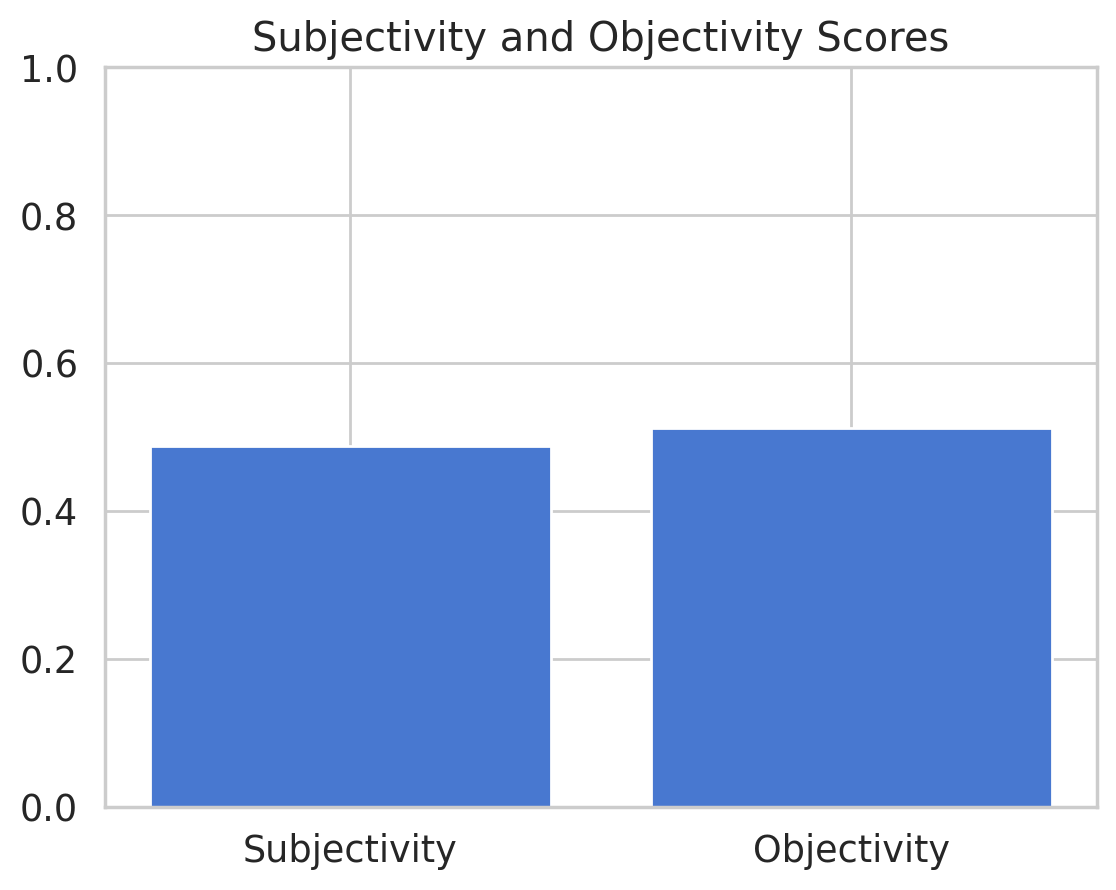

In [65]:
# 시각화
labels = ['Subjectivity', 'Objectivity']
scores = dataset_raw[['subjectivity', 'objectivity']].mean()

plt.bar(labels, scores)
plt.ylim(0, 1)
plt.title("Subjectivity and Objectivity Scores")
plt.show()

In [66]:
from google.colab import files

# 결과를 CSV 파일로 저장
csv_filename = 'output.csv'
dataset_raw.to_csv(csv_filename, index=False)

# 파일 다운로드
files.download(csv_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>